# Drug Target Distributions

For each target (gene) in our Drug-Gene-Disease table, plot the expression distributions across tissue types grouped by dataset.

In [42]:
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from collections import defaultdict

from rnaseq_lib.tissues import get_normal_samples
from rnaseq_lib.tissues import get_tumor_samples
from rnaseq_lib.tissues import get_gtex_samples
from rnaseq_lib.tissues import return_samples
from rnaseq_lib.tissues import map_genes

from rnaseq_lib.utils import rexpando
from rnaseq_lib.utils import flatten

from IPython.display import display  # Provides control of text / plot during iterations

## Inputs

Expression dataframe

In [2]:
df = pd.read_csv('/mnt/rna-seq-analysis/data/xena/deseq2_normalized_tcga_gtex_counts.tsv', 
                 index_col=0, sep='\t')

Map gene IDs to gene names

In [13]:
df.index = map_genes(df.index)
df.head(1)

,TCGA-AD-5900-01,TCGA-BP-4968-01,TCGA-NG-A4VU-01,TCGA-CG-4305-01,TCGA-AO-A03M-01,TCGA-ZH-A8Y6-01,TCGA-HT-7686-01,TCGA-BR-6458-11,TCGA-29-1699-01,TCGA-KK-A6E1-01,...,GTEX-ZUA1-0226-SM-5NQ9Q,GTEX-Q734-0526-SM-2I3EH,GTEX-Y5V6-0526-SM-4VBRV,GTEX-1192X-3126-SM-5N9BY,GTEX-13X6H-0526-SM-5LU4Q,K-562-SM-3MJHH,GTEX-11GSO-2326-SM-5A5LX,GTEX-YJ8A-1126-SM-5IFJU,GTEX-RU1J-0226-SM-2TF5Y,GTEX-12BJ1-0426-SM-5FQSO
GRIN3B,4.381288,1.511815,1.430657,0.986667,1.945771,0.903716,0.0,0.0,8.441424,3.926956,...,14.301939,77.979912,15.608325,8.31345,31.846108,15.292863,14.530338,17.417563,17.747865,17.67672


Drug-Gene-Disease dataframe

In [4]:
dgd = pd.read_csv('../Gene-Drug-Disease-Table/combined-table/combined-deseq2.tsv', sep='\t', index_col=0)
dgd.head(1)

,Target,Target Pathway,brand_name,evidence,gene,generic_name,mech_action,tissue,usage,pval_adj,l2fc,pval_rank
Source,,,,,,,,,,,,
humanized,CD52,NaN,Campath,1 INDICATIONS AND USAGE Campath is indicated a...,CD52,ALEMTUZUMAB,12.1 Mechanism of Action Campath binds to CD52...,Blood,1 INDICATIONS AND USAGE Campath is indicated a...,NaN,NaN,NaN


Remove drugs for Blood / Bone cancers since there are no tissue samples

In [5]:
dgd = dgd[(dgd.tissue != 'Blood') & (dgd.tissue != 'Bone')]

Create a dictionary mapping gene to tissue and gene to drug

In [50]:
gene_map = {k: {'tissue': set(g['tissue'].tolist()), 'drug': set(g['generic_name'].tolist())} 
            for k, g in dgd.groupby('gene')}

## Plots

For each gene, plot the expression distributions for each tissue grouped by dataset

ALK
Tissues: Lung
Drugs: ALECTINIB HYDROCHLORIDE, CRIZOTINIB


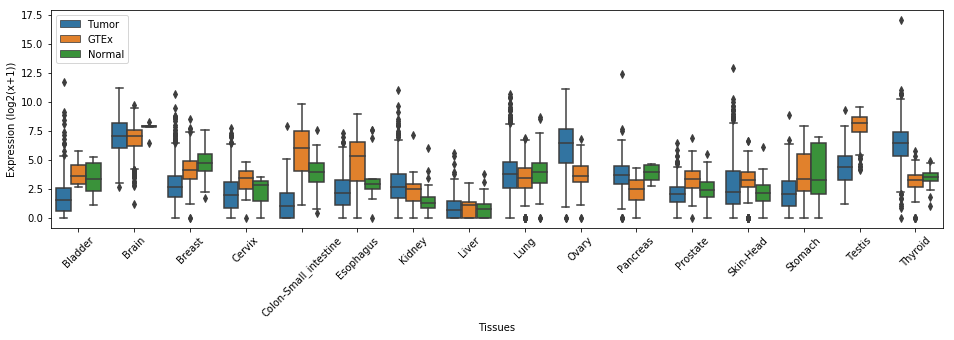

AR
Tissues: Prostate
Drugs: BICALUTAMIDE


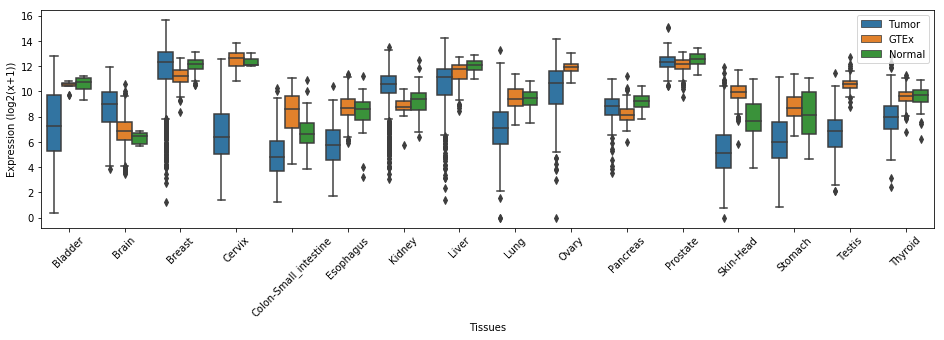

BRAF
Tissues: Skin-Head
Drugs: DABRAFENIB


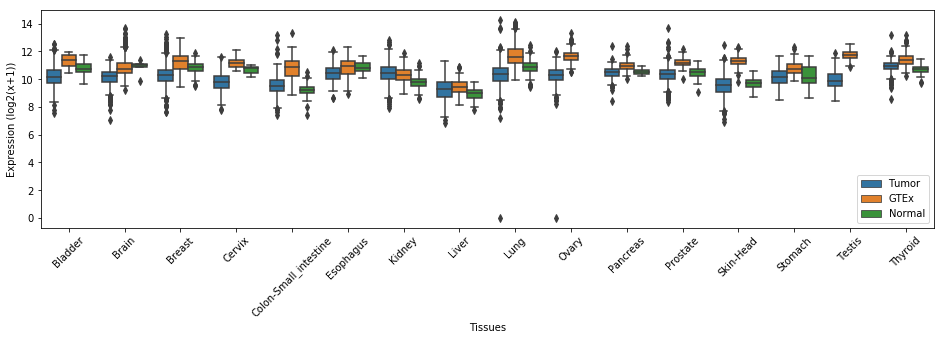

CD274
Tissues: Skin-Head, Lung, Bladder
Drugs: DURVALUMAB, ATEZOLIZUMAB, AVELUMAB


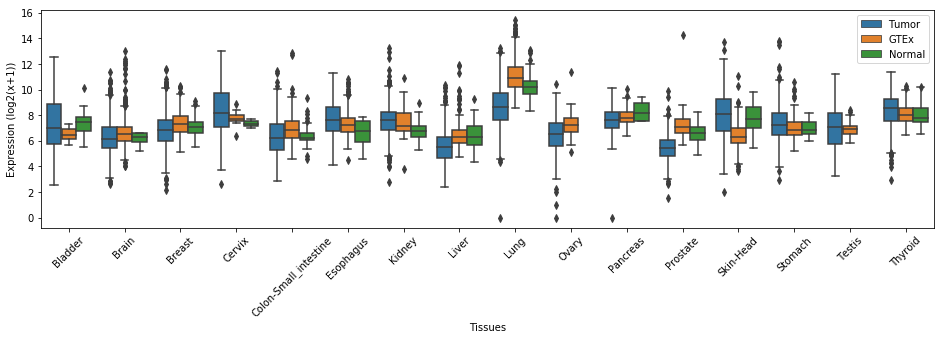

CDK4
Tissues: Breast
Drugs: PALBOCICLIB


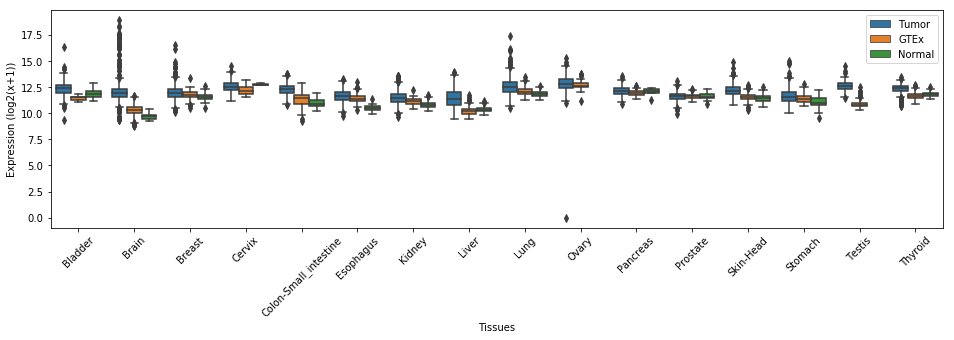

CDK6
Tissues: Breast
Drugs: PALBOCICLIB


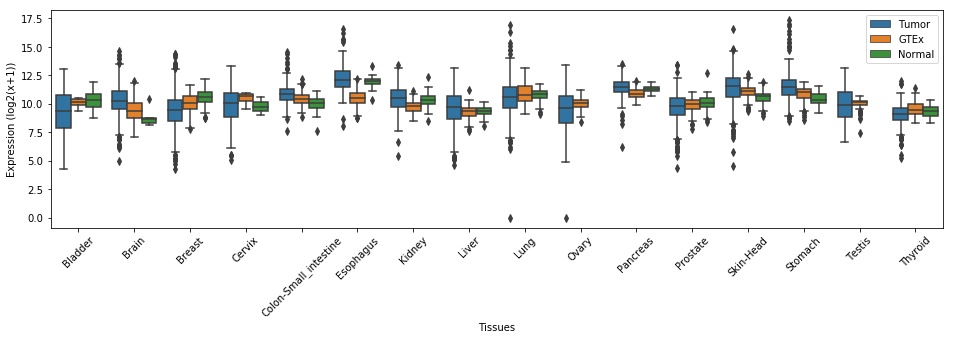

CSF1R
Tissues: Stomach, Kidney, Pancreas
Drugs: SUNITINIB MALATE, PAZOPANIB HYDROCHLORIDE


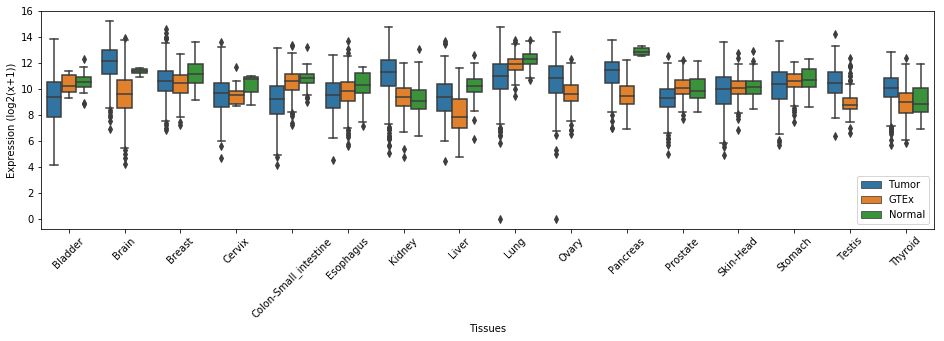

CTLA4
Tissues: Skin-Head
Drugs: IPILIMUMAB


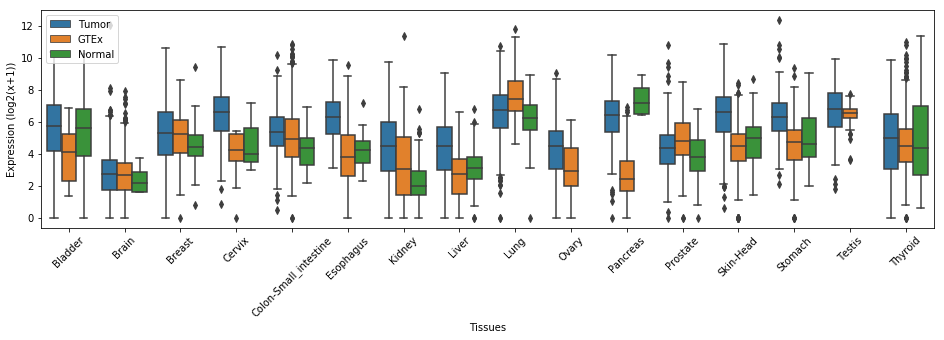

EGFR
Tissues: Skin-Head, Lung, Breast, Colon-Small_intestine, Pancreas
Drugs: ERLOTINIB HYDROCHLORIDE, CETUXIMAB, LAPATINIB, GEFITINIB, AFATINIB, PANITUMUMAB, NECITUMUMAB


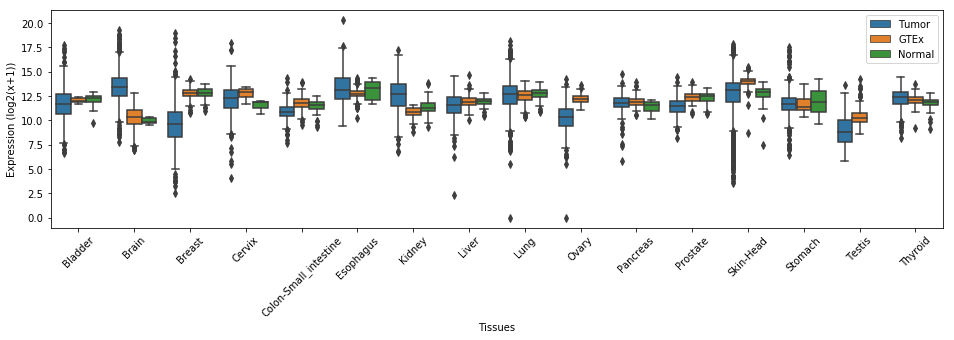

ERBB2
Tissues: Lung, Breast
Drugs: LAPATINIB, PERTUZUMAB, ADO-TRASTUZUMAB EMTANSINE, AFATINIB


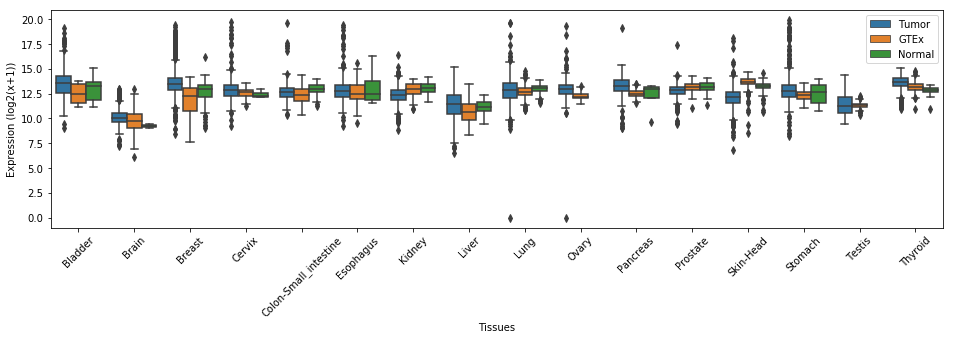

ESR1
Tissues: Ovary, Breast
Drugs: TAMOXIFEN CITRATE


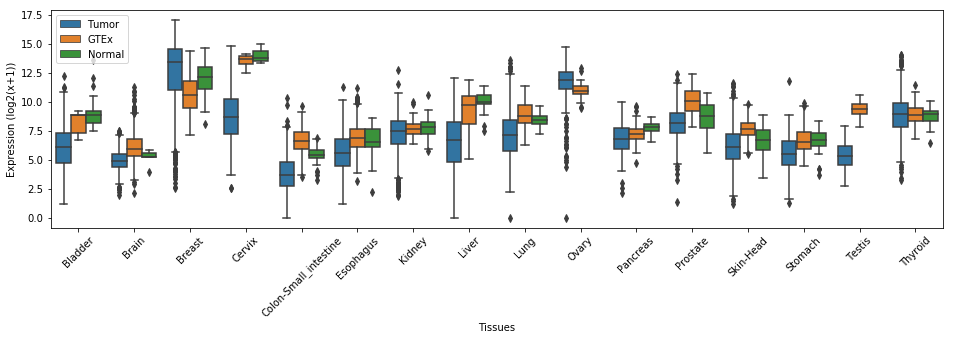

FLT1
Tissues: Thyroid
Drugs: CABOZANTINIB


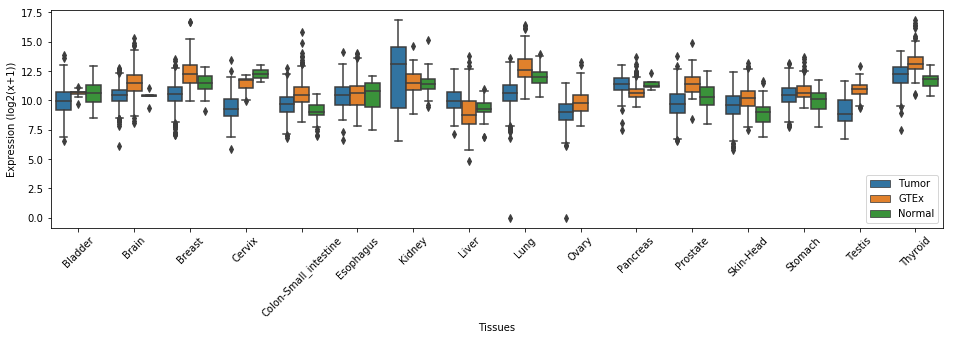

FLT3
Tissues: Thyroid, Stomach, Kidney, Pancreas
Drugs: CABOZANTINIB, SUNITINIB MALATE


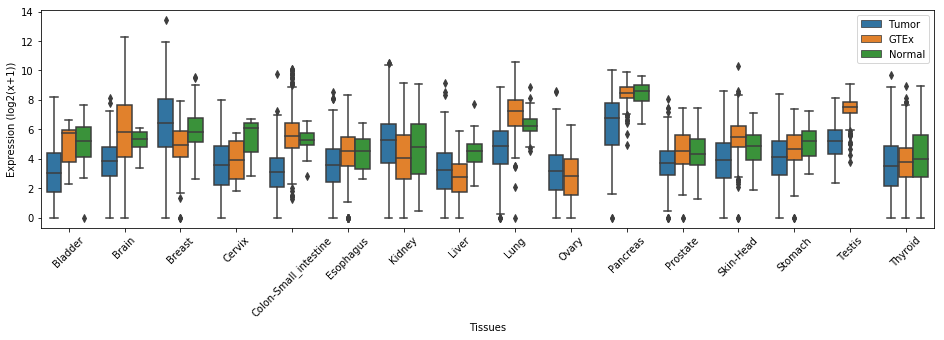

FLT4
Tissues: Thyroid, Stomach, Liver, Kidney, Pancreas
Drugs: SORAFENIB, SUNITINIB MALATE, AXITINIB, CABOZANTINIB


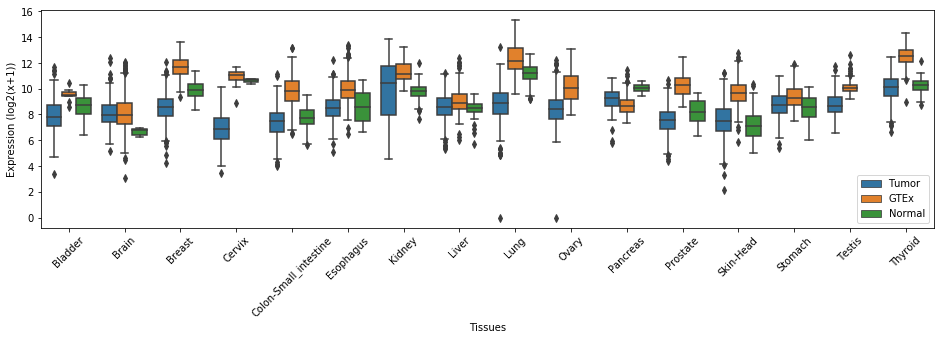

KDR
Tissues: Stomach, Esophagus, Lung, Colon-Small_intestine
Drugs: RAMUCIRUMAB


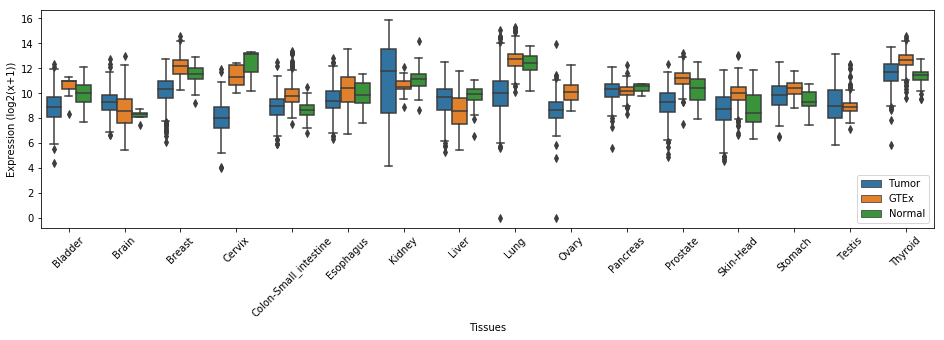

KIT
Tissues: Thyroid, Stomach, Liver, Kidney, Pancreas
Drugs: SORAFENIB, SUNITINIB MALATE, AXITINIB, CABOZANTINIB, PAZOPANIB HYDROCHLORIDE


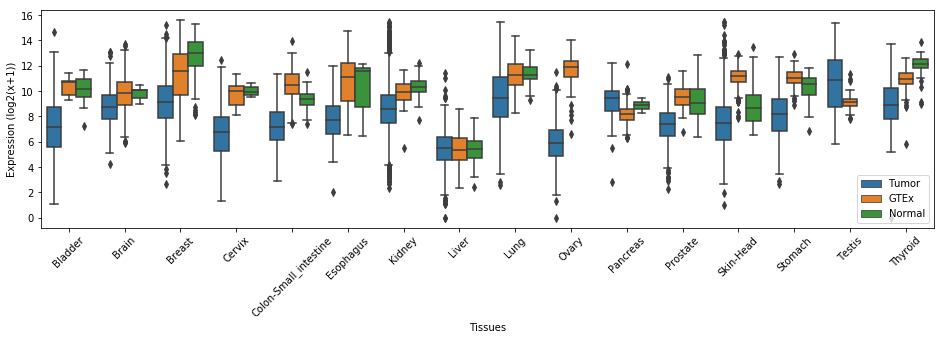

MAP2K2
Tissues: Skin-Head, Lung
Drugs: TRAMETINIB


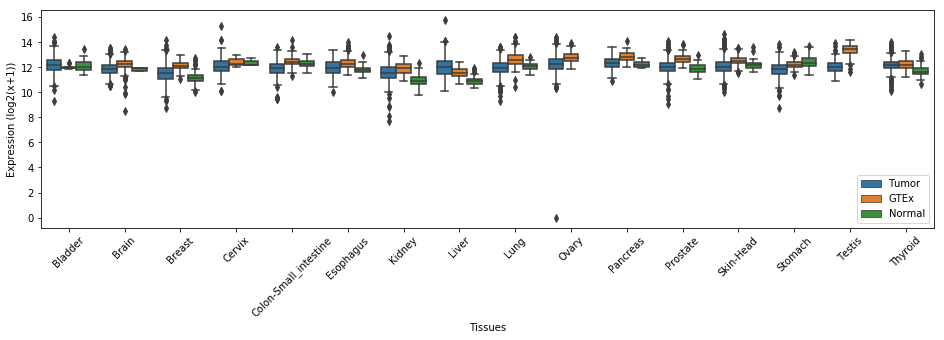

MET
Tissues: Thyroid, Lung
Drugs: CABOZANTINIB, CRIZOTINIB


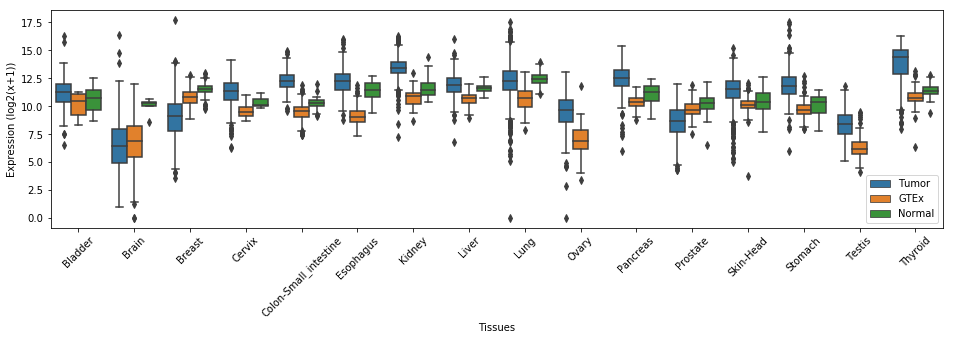

MMRN2
Tissues: Cervix, Ovary, Lung, Colon-Small_intestine, Kidney
Drugs: BEVACIZUMAB


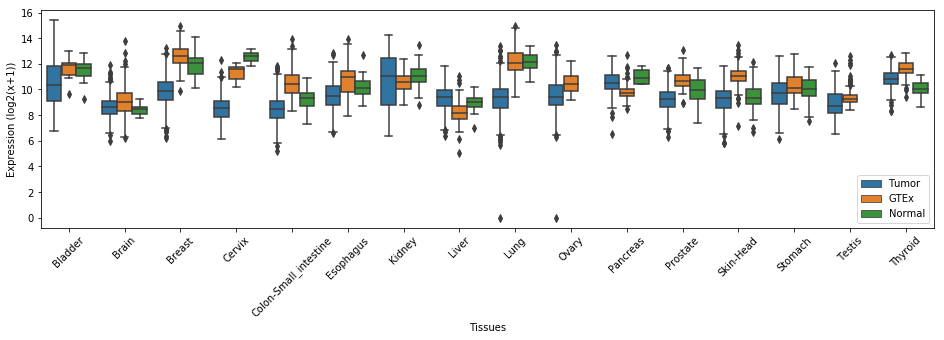

MTOR
Tissues: Kidney
Drugs: TEMSIROLIMUS


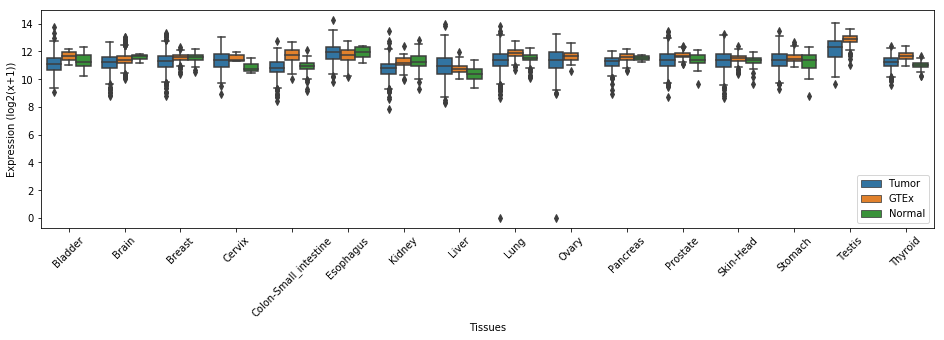

PARP1
Tissues: Ovary
Drugs: RUCAPARIB, OLAPARIB


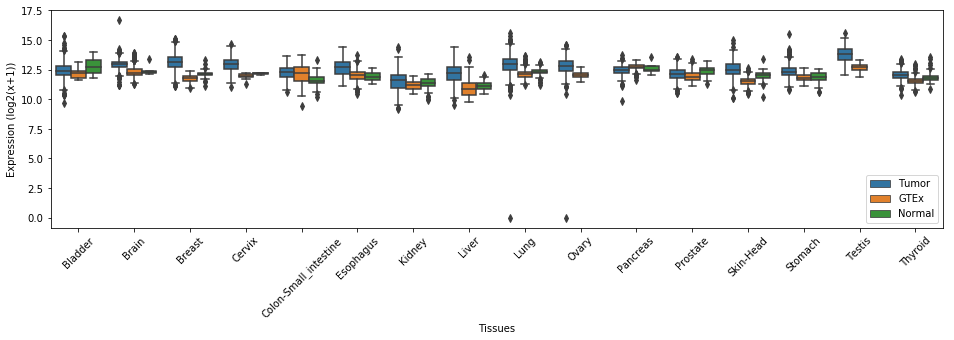

PARP2
Tissues: Ovary
Drugs: RUCAPARIB, OLAPARIB


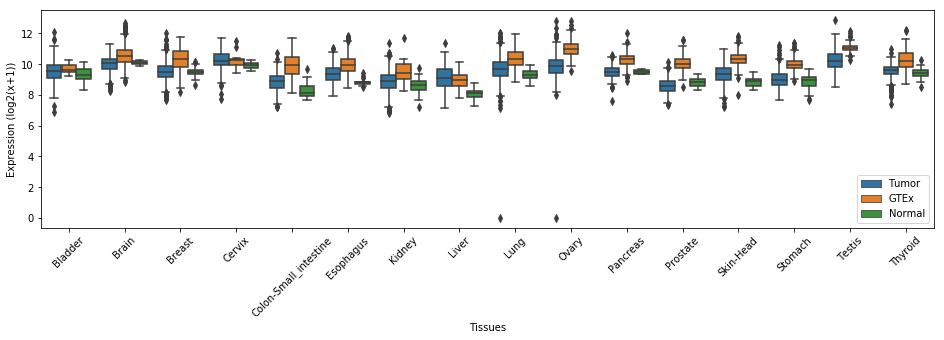

PDCD1
Tissues: Kidney, Skin-Head, Lung, Bladder, Colon-Small_intestine
Drugs: PEMBROLIZUMAB, NIVOLUMAB


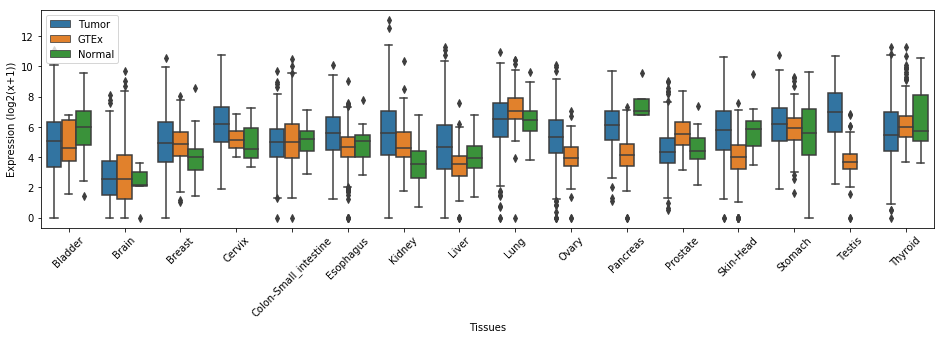

PDGFRA
Tissues: Stomach, Kidney
Drugs: PAZOPANIB HYDROCHLORIDE


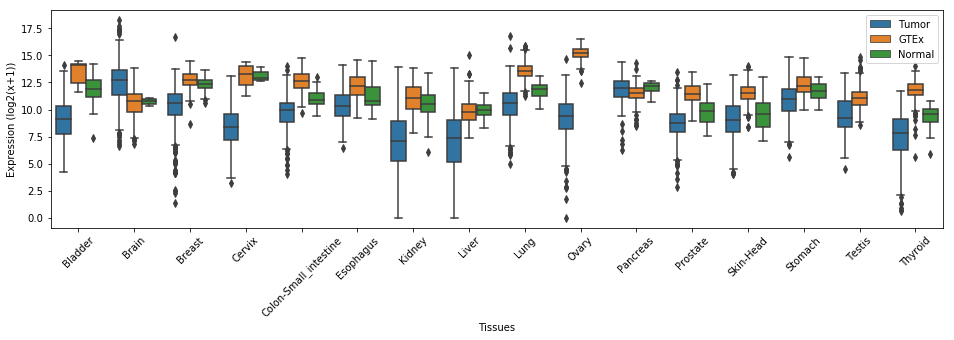

PDGFRB
Tissues: Stomach, Kidney
Drugs: PAZOPANIB HYDROCHLORIDE


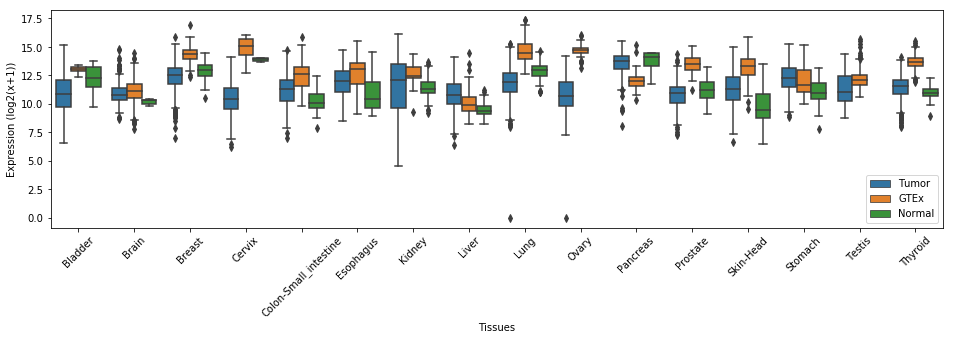

PDGFRL
Tissues: Thyroid, Stomach, Liver, Kidney, Pancreas
Drugs: SORAFENIB, SUNITINIB MALATE, AXITINIB


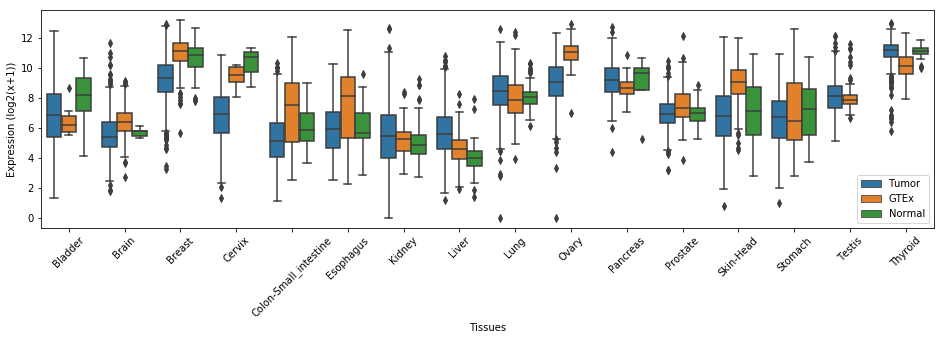

PPP4R3A
Tissues: Skin-Head, Lung
Drugs: TRAMETINIB


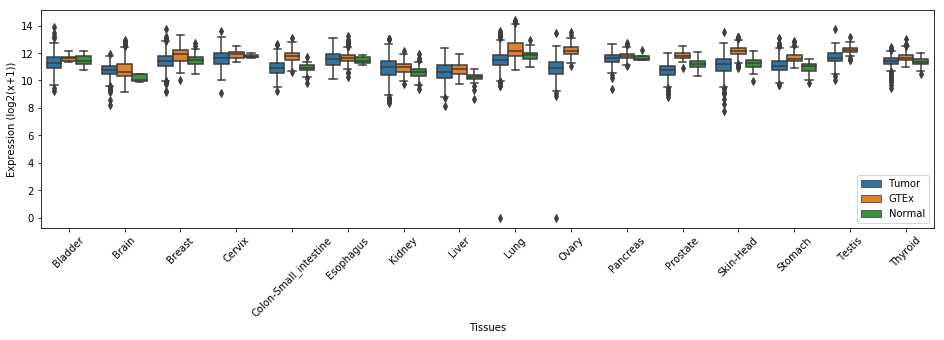

RAF1
Tissues: Thyroid, Liver, Kidney
Drugs: SORAFENIB


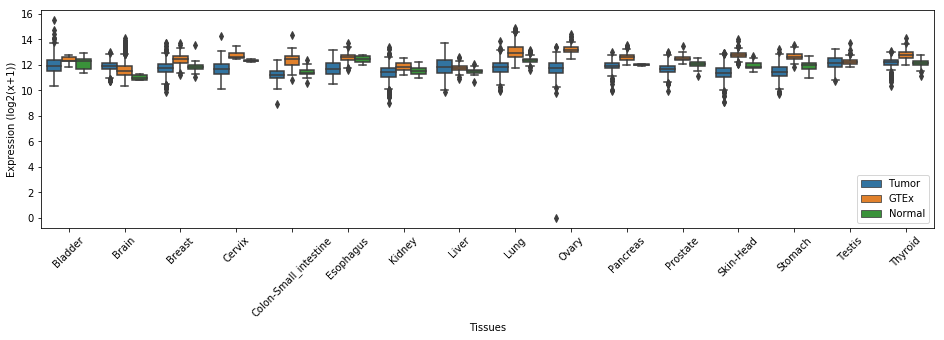

RET
Tissues: Thyroid, Stomach, Kidney, Pancreas
Drugs: CABOZANTINIB, SUNITINIB MALATE


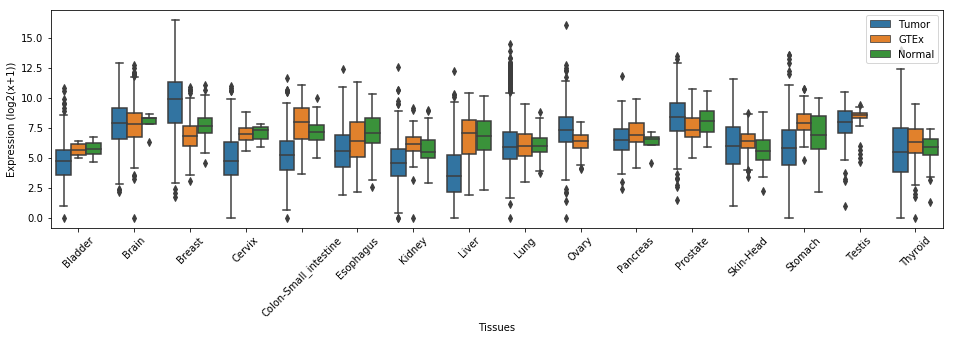

ROS1
Tissues: Lung
Drugs: CRIZOTINIB


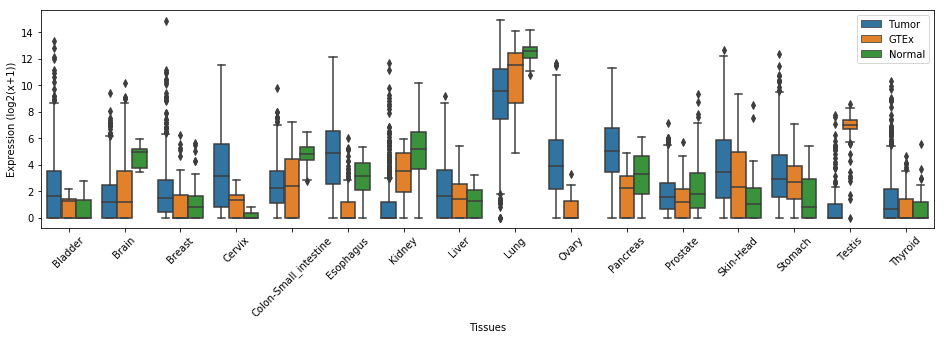

SMO
Tissues: Skin-Head
Drugs: VISMODEGIB


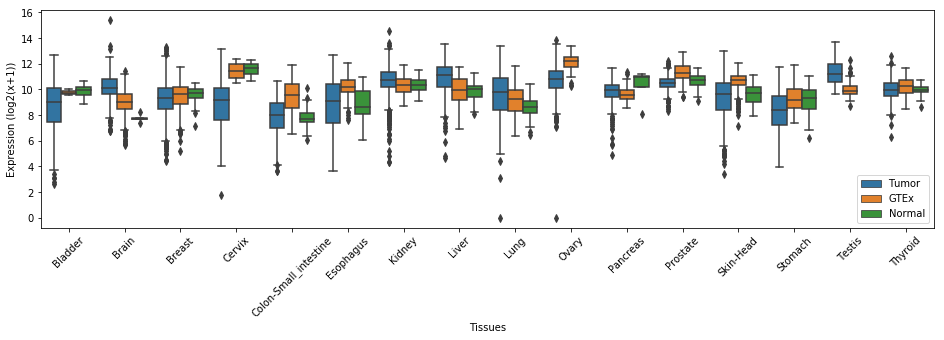

TNFSF11
Tissues: Prostate, Breast
Drugs: DENOSUMAB


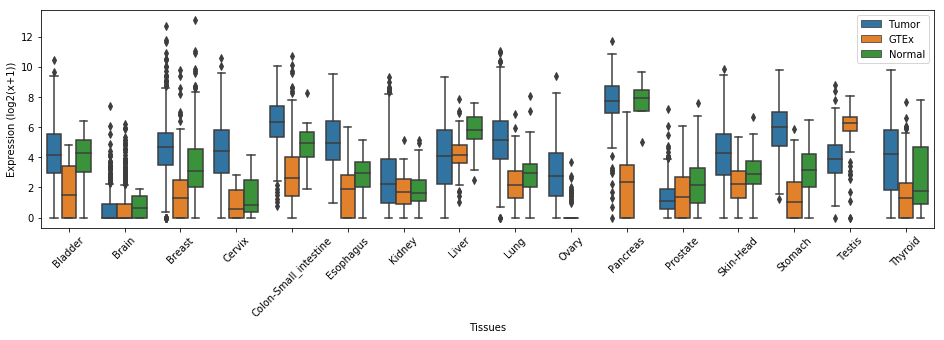

TOP2A
Tissues: Testis, Lung
Drugs: ETOPOSIDE


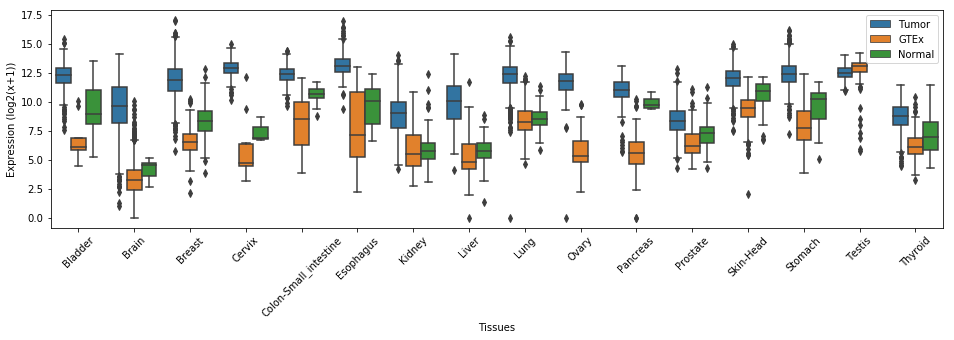

UBA2
Tissues: Thyroid, Stomach, Bladder, Brain, Breast, Ovary
Drugs: DOXORUBICIN HYDROCHLORIDE


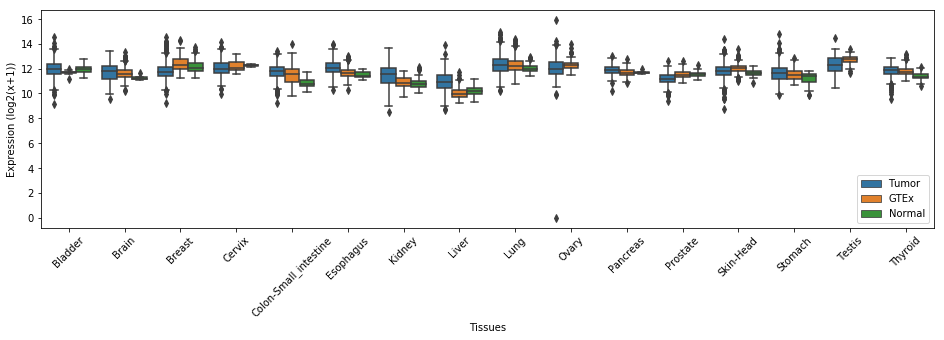

In [51]:
for gene in sorted(gene_map):
    print gene
    print 'Tissues: {}'.format(', '.join(gene_map[gene]['tissue']))
    print 'Drugs: {}'.format(', '.join(gene_map[gene]['drug']))
    
    # Collect information for plot
    info = defaultdict(list)
    for tissue in sorted(dgd.tissue.unique()):
        t = get_tumor_samples(tissue)
        g = get_gtex_samples(tissue)
        n = get_normal_samples(tissue)
        info['exp'].extend(flatten(df.loc[gene][x].tolist() for x in [t, g, n]))
        info['dataset'].extend(['Tumor' for _ in t] + ['GTEx' for _ in g] + ['Normal' for _ in n])
        info['label'].extend([tissue for _ in t + g + n])
        info['sample'].extend(t + g + n)
    info['exp'] = map(lambda x: np.log2(x + 1), info['exp'])
    
    # Plot
    f, ax = plt.subplots(figsize=(16, 4))
    sns.boxplot(data=info, x='label', y='exp', hue='dataset', ax=ax)
    plt.ylabel('Expression (log2(x+1))')
    plt.xlabel('Tissues')
    plt.xticks(rotation=45)
    display(f)
    plt.close(f)